# Bill Policy Areas and Geographic Regions: Is there a Correlation? 
##### By Noah Woosley, Noah Rand, Mark Belanger
##### March 31, 2023

### Research Question: Do senators from states in different geographical regions favor the proposition of certain bill policy areas over?
The United States is a large country from many standpoints, including land area, population, economics output, and more. Being so large means that some regions of the country have different needs and interests than other. These needs and interest can carry over to Congress.

When a Senator proposes a bill, it has to be designated with one of thirty-two policy areas. These policy areas label the overall topic of the bill being proposed. These policy areas range agriculture to water to immigration to energy and more. When proposing policy in Congress, Senators from some states might favor proposing bills of certain policy areas more than other because of the aforementioned differences in regions. For example, Senators from Midwestern states may favor agricultural bills because of the large farming industry present there while Senators from Western states may favor water bills because of the droughts they experience. 

This project attempts to study if there is a noticeable correlation between geographic region and the most common bill policy area from Senators of each state. Please run the following two code cells to ensure that the notebook is up to date and the proper libraries are imported

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
from get_data import get_data
from api_keys import API_KEY
from data_processing import common_subject, count_subject
from maps import get_map_data, make_geodata, add_map_data

### Methodology

In [10]:
get_data(117, 117, API_KEY)
bills = pd.read_csv("bills_data.csv")

KeyError: 'bills'

*explain that modern bills are usually omnibus bills

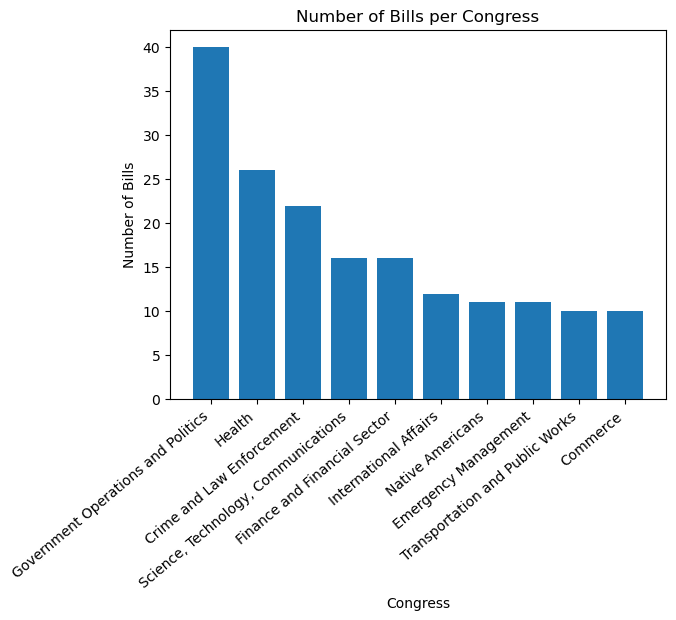

In [44]:
# Bills per Congress plot
bills = pd.read_csv("bills_data.csv")
bills_per_congress = bills["Policy Areas"].value_counts()
plt.bar(bills_per_congress.index.tolist()[0:10], bills_per_congress.tolist()[0:10], tick_label = bills_per_congress.index.tolist()[0:10])
plt.title("Number of Bills per Congress")
plt.xlabel("Congress")
plt.ylabel("Number of Bills")
plt.xticks(rotation=40, ha = "right")
plt.show()

### Results

In [ ]:
# Dictionaries needed for geoplots
states_and_policy_areas = bills[["State","Policy Areas"]]
state_policy_dict = {}
for state in states_and_policy_areas["State"].tolist(): 
    state_policy_dict[state] = states_and_policy_areas[states_and_policy_areas["State"]==state]["Policy Areas"].tolist()
state_subject_dict = count_subject(state_policy_dict)
most_common_policy_area = common_subject(state_subject_dict)


In [ ]:
# Data calculations to make geoplot
map_data_dict = get_map_data()
new_map_data_dict = add_map_data(map_data_dict,bills["State"].value_counts().to_dict(),most_common_policy_area)
map_data_geoframe = make_geodata(new_map_data_dict)

In [ ]:
# Bills per State geoplot
gplt.choropleth(
    map_data_geoframe,
    hue="bill count",
    cmap = "OrRd",
    legend = True,
)
print("Bill Count by State")

In [ ]:
# Most common policy areas per state geoplot
gplt.choropleth(
    map_data_geoframe,
    hue="policy area",
    cmap = "tab20",
    legend = True,
    legend_kwargs={'bbox_to_anchor': (1.5, 1), 'frameon': False},
)
print("Most Common Policy Area by State")

### Analysis